In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataFolder.zip to dataFolder.zip


In [ ]:
!unzip dataFolder.zip

Streaming output truncated to the last 5000 lines.
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.31930600000001_29.373831.jpeg  
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.31935899999999_29.373959999999997.jpeg  
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.319498_29.374303.jpeg  
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.319525_29.372438.jpeg  
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.319563_29.374836.jpeg  
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.319579_29.374888000000002.jpeg  
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.31972900000001_29.373569.jpeg  
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.319785_29.376170000000002.jpeg  
  inflating: coe379L-sp25-master/datasets/unit03/Project3/no_damage/-95.32006700000001_29.374474.jpeg  
  inflating: coe379L-sp25-

In [ ]:
# check if directories are clean
import shutil
try:
    shutil.rmtree("sample_data/data-split/train")
    shutil.rmtree("sample_data/data-split/test")
except:
    pass

In [ ]:
# two classes: damage and no-damage
# create directories for each class in the train and test directories.
import os
# ensure directories exist
from pathlib import Path

Path("sample_data/data-split/train/damage").mkdir(parents=True, exist_ok=True)
Path("sample_data/data-split/train/no-damage").mkdir(parents=True, exist_ok=True)
Path("sample_data/data-split/test/damage").mkdir(parents=True, exist_ok=True)
Path("sample_data/data-split/test/no-damage").mkdir(parents=True, exist_ok=True)

In [ ]:
# paths of images for individual classes to copy them in new directories
all_damage_paths = os.listdir('sample_data/damage')
all_no_damage_paths = os.listdir('sample_data/no_damage')

In [ ]:
import random

train_damage_paths = random.sample(all_damage_paths, int(len(all_damage_paths)*0.8))
print("train damage image count: ", len(train_damage_paths))
test_damage_paths = [ p for p in all_damage_paths if p not in train_damage_paths]
print("test damage image count: ", len(test_damage_paths))

# ensure no overlap:
overlap = [p for p in train_damage_paths if p in test_damage_paths]
print("len of overlap: ", len(overlap))

train_no_damage_paths = random.sample(all_no_damage_paths, int(len(all_no_damage_paths)*0.8))
print("train no damage image count: ", len(train_no_damage_paths))
test_no_damage_paths = [ p for p in all_no_damage_paths if p not in train_no_damage_paths]
print("test no damage image count: ", len(test_no_damage_paths))

# ensure no overlap:
overlap = [p for p in train_no_damage_paths if p in test_no_damage_paths]
print("len of overlap: ", len(overlap))

train damage image count:  11336
test damage image count:  2834
len of overlap:  0
train no damage image count:  5721
test no damage image count:  1431
len of overlap:  0


In [ ]:
# ensure to copy the images to the directories
import shutil
for p in train_damage_paths:
    shutil.copyfile(os.path.join('sample_data/damage', p), os.path.join('sample_data/data-split/train/damage', p) )

for p in test_damage_paths:
    shutil.copyfile(os.path.join('sample_data/damage', p), os.path.join('sample_data/data-split/test/damage', p) )

for p in train_no_damage_paths:
    shutil.copyfile(os.path.join('sample_data/no_damage', p), os.path.join('sample_data/data-split/train/no-damage', p) )

for p in test_no_damage_paths:
    shutil.copyfile(os.path.join('sample_data/no_damage', p), os.path.join('sample_data/data-split/test/no-damage', p) )

# check counts:
print("Files in train/damage: ", len(os.listdir("sample_data/data-split/train/damage")))
print("Files in train/no_damage: ", len(os.listdir("sample_data/data-split/train/no-damage")))

print("Files in test/damage: ", len(os.listdir("sample_data/data-split/test/damage")))
print("Files in test/no_damage: ", len(os.listdir("sample_data/data-split/test/no-damage")))

Files in train/damage:  11336
Files in train/no_damage:  5721
Files in test/damage:  2834
Files in test/no_damage:  1431


Found 17057 files belonging to 2 classes.
Using 13646 files for training.
Using 3411 files for validation.
Image shape: (32, 128, 128, 3)
Label shape: (32,)
Data type: <dtype: 'float32'>


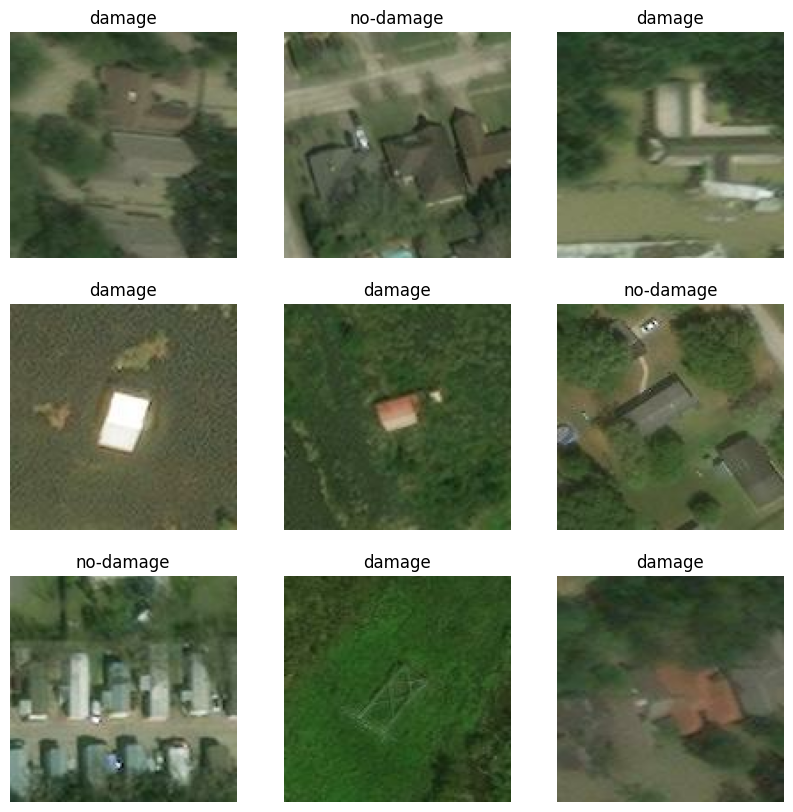

In [ ]:
# import needed classes and functions
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Rescaling

# path to training data
train_data_dir = 'sample_data/data-split/train'

batch_size = 32

# target image size
img_height = 128
img_width = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# inspecting a batch
for images, labels in train_ds.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    print("Data type:", images.dtype)
    break

# displaying images
import matplotlib.pyplot as plt
class_names = train_ds.class_names

# used chat gpt to display this
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# rescale instance
rescale = Rescaling(scale=1.0/255)

# apply the rescale to the train and validation sets
train_rescale_ds = train_ds.map(lambda image,label:(rescale(image),label))
val_rescale_ds = val_ds.map(lambda image,label:(rescale(image),label))

In [ ]:
# path to test data
test_data_dir = 'sample_data/data-split/test'

# we do not set subset=both here because we do not want the test set split
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
)

# approach 1: manually rescale data --
rescale = Rescaling(scale=1.0/255)
test_rescale_ds = test_ds.map(lambda image,label:(rescale(image),label))

Found 4265 files belonging to 2 classes.


# Model design, training and evaluation

### ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Flattened size for RGB image (150x150x3)
image_size = 150 * 150 * 3

# Define the ANN model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(150, 150, 3)))  # flatten image into 1D vector
model.add(Dense(784, activation='relu'))

# Hidden layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_rescale_ds,
    validation_data=val_rescale_ds,
    epochs=5,
    verbose=2
)

Epoch 1/5
427/427 - 461s - 1s/step - accuracy: 0.6260 - loss: 3.4172 - val_accuracy: 0.7329 - val_loss: 0.5566
Epoch 2/5
427/427 - 503s - 1s/step - accuracy: 0.7016 - loss: 0.6007 - val_accuracy: 0.7364 - val_loss: 0.5611
Epoch 3/5
427/427 - 429s - 1s/step - accuracy: 0.7010 - loss: 0.5944 - val_accuracy: 0.7139 - val_loss: 0.5702
Epoch 4/5
427/427 - 449s - 1s/step - accuracy: 0.7261 - loss: 0.5652 - val_accuracy: 0.7300 - val_loss: 0.5523
Epoch 5/5
427/427 - 534s - 1s/step - accuracy: 0.6893 - loss: 0.5961 - val_accuracy: 0.6681 - val_loss: 0.6396


In [ ]:
from tensorflow.keras import layers, models, optimizers

model_lenet = models.Sequential()

model_lenet.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
model_lenet.add(layers.AveragePooling2D(pool_size=(2, 2)))

model_lenet.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_lenet.add(layers.AveragePooling2D(pool_size=(2, 2)))

model_lenet.add(layers.Flatten())

model_lenet.add(layers.Dense(120, activation='relu'))

model_lenet.add(layers.Dense(84, activation='relu'))

model_lenet.add(layers.Dense(2, activation='softmax'))

model_lenet.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_lenet.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 73, 73, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 34, 34, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │     2,219,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,232,846 (8.52 MB)

 Trainable params: 2,232,846 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_lenet.fit(
            train_rescale_ds,
            epochs=20,
            validation_data=val_rescale_ds
)

Epoch 1/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 248s 576ms/step - accuracy: 0.6866 - loss: 0.6140 - val_accuracy: 0.8440 - val_loss: 0.4722
Epoch 2/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 260s 573ms/step - accuracy: 0.8062 - loss: 0.4654 - val_accuracy: 0.8561 - val_loss: 0.4185
Epoch 3/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 265s 621ms/step - accuracy: 0.8323 - loss: 0.4121 - val_accuracy: 0.7804 - val_loss: 0.4942
Epoch 4/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 264s 618ms/step - accuracy: 0.8421 - loss: 0.3923 - val_accuracy: 0.7071 - val_loss: 0.5905
Epoch 5/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 264s 619ms/step - accuracy: 0.8573 - loss: 0.3663 - val_accuracy: 0.8736 - val_loss: 0.3378
Epoch 6/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 244s 570ms/step - accuracy: 0.8616 - loss: 0.3343 - val_accuracy: 0.8654 - val_loss: 0.3281
Epoch 7/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 263s 616ms/step - accuracy: 0.8783 - loss: 0.3110 - val_accuracy: 0.8279 - val_loss: 0.4009
Epoch 8/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 244s 571ms/step - accuracy: 0.8853 -

In [ ]:
from tensorflow.keras import layers, models, optimizers

model_alternate_lenet = models.Sequential()

model_alternate_lenet.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(128, 128, 3)))
model_alternate_lenet.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_alternate_lenet.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_alternate_lenet.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_alternate_lenet.add(layers.Conv2D(120, kernel_size=(5, 5), activation='relu'))

model_alternate_lenet.add(layers.Flatten())
model_alternate_lenet.add(layers.Dense(84, activation='relu'))

##model_alternate_lenet.add(layers.Dense(2, activation='softmax'))
model_alternate_lenet.add(layers.Dense(1, activation='sigmoid'))


model_alternate_lenet.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_alternate_lenet.summary()

# trained with 20 epochs before but had last minute changes made w/ Prof Jamthe after class so trained on 2 epochs 
history = model_alternate_lenet.fit(
            train_rescale_ds,
            epochs=2,
            validation_data=val_rescale_ds
)
model_alternate_lenet.save("damage.keras")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 25, 25, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 75000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │     6,300,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,351,161 (24.23 MB)

 Trainable params: 6,351,161 (24.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
427/427 ━━━━━━━━━━━━━━━━━━━━ 258s 598ms/step - accuracy: 0.7233 - loss: 0.5670 - val_accuracy: 0.8528 - val_loss: 0.3937
Epoch 2/2
427/427 ━━━━━━━━━━━━━━━━━━━━ 303s 695ms/step - accuracy: 0.8551 - loss: 0.3740 - val_accuracy: 0.8519 - val_loss: 0.3792


In [ ]:
!pip install Pillow

In [38]:
from PIL import Image
import numpy as np

path='/content/coe379L-sp25-master/code/Project3/data/damage/-93.66109_30.212114.jpeg'
img = Image.open(path).resize((128, 128))
img_array = np.array(img) / 255.0
img_list = np.expand_dims(img_array, axis=0)
prediction  = model_alternate_lenet.predict(img_list)
a = prediction
print(type(a))
print(a[0].shape)
print(prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
<class 'numpy.ndarray'>
(1,)
0.3698497


In [ ]:
!file damage.keras

damage.keras: Zip archive data, at least v2.0 to extract, compression method=store


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
